# 1 판다스 패키지의 소개

* 대부분의 데이터는 시계열(series)이나 표(table)의 형태로 나타낼 수 있다. 
* 판다스(Pandas) 패키지는 이러한 데이터를 다루기 위한 시리즈(``Series``) 클래스와 데이터프레임(``DataFrame``) 클래스를 제공한다.

## 판다스 패키지 임포트

* 판다스 패키지를 사용하기 위해 우선 임포트를 해야 한다. 
* 판다스 패키지는 `pd`라는 별칭으로 임포트하는 것이 관례이다. 


In [5]:
import pandas as pd

## 시리즈 클래스

```{margin}
`Series`
```

```{margin}
인덱스(index)
```

```{margin}
값(value)
```

* 시리즈 ``Series`` 클래스는 넘파이에서 제공하는 1차원 배열과 비슷하지만 각 데이터의 의미를 표시하는 인덱스(index)를 붙일 수 있다. 
* 데이터 자체는 값(value)라고 한다.

> 시리즈 = 값(value) + 인덱스(index)

### 시리즈 생성

```{margin}
인덱스 라벨(index label)
```

* 데이터를 리스트나 1차원 배열 형식으로 ``Series`` 클래스 생성자에 넣어주면 시리즈 클래스 객체를 만들 수 있다. 
* 이 때 인덱스의 길이는 데이터의 길이와 같아야 한다. 
* 다음 예에서 이 "서울", "부산" 등의 문자열이 인덱스의 값이다. 
* 인덱스의 값을 인덱스 라벨(label)이라고도 한다. 
* 인덱스 라벨은 문자열 뿐 아니라 날짜, 시간, 정수 등도 가능하다.

다음 예제는 각 도시의 2015년 인구 데이터를 시리즈로 만든 것이다.

In [6]:
s = pd.Series([9904312, 3448737, 2890451, 2466052],
              index=["서울", "부산", "인천", "대구"])
s

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

만약 인덱스를 지정하지 않고 시리즈를 만들면 시리즈의 인덱스는 0부터 시작하는 정수값이 된다.

In [7]:
pd.Series(range(10, 14))

0    10
1    11
2    12
3    13
dtype: int64

```{margin}
`Series.index` 속성
```

```{margin}
`Series.values` 속성
```

시리즈의 인덱스는 ``index`` 속성으로 접근할 수 있다. 시리즈의 값은 1차원 배열이며 ``values`` 속성으로 접근할 수 있다.

In [8]:
s.index

Index(['서울', '부산', '인천', '대구'], dtype='object')

In [9]:
s.values

array([9904312, 3448737, 2890451, 2466052])

```{margin}
`Series.name` 속성
```

```{margin}
`Series.index.name` 속성
```

`name` 속성을 이용하여  시리즈 데이터에 이름을 붙일 수 있다. `index.name` 속성으로 시리즈의 인덱스에도 이름을 붙일 수 있다. 

In [10]:
s.name = "인구"
s.index.name = "도시"
s

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

### 시리즈 연산

* 넘파이 배열처럼 시리즈도 벡터화 연산을 할 수 있다. 
* 다만 연산은 시리즈의 값에만 적용되며 인덱스 값은 변하지 않는다. 
* 예를 들어 인구 숫자를 백만 단위로 만들기 위해 시리즈 객체를 1,000,000 으로 나누어도 인덱스 라벨에는 영향을 미치지 않는 것을 볼 수 있다.

In [11]:
s / 1000000

도시
서울    9.904312
부산    3.448737
인천    2.890451
대구    2.466052
Name: 인구, dtype: float64

### 시리즈 인덱싱

* 시리즈는 넘파이 배열에서 가능한 인덱스 방법 이외에도 인덱스 라벨을 이용한 인덱싱도 할 수 있다. 
* 배열 인덱싱이나 인덱스 라벨을 이용한 슬라이싱(slicing)도 가능하다. 

시리즈 데이터를 인덱싱하면 값이 나온다.

In [12]:
s[1], s["부산"]

(3448737, 3448737)

In [13]:
s[3], s["대구"]

(2466052, 2466052)

배열 인덱싱을 하면 부분적인 값을 가지는 시리즈 자료형을 반환한다. 자료의 순서를 바꾸거나 특정한 자료만 선택할 수 있다.

In [14]:
s[[0, 3, 1]]

도시
서울    9904312
대구    2466052
부산    3448737
Name: 인구, dtype: int64

In [15]:
s[["서울", "대구", "부산"]]

도시
서울    9904312
대구    2466052
부산    3448737
Name: 인구, dtype: int64

In [16]:
s[(250e4 < s) & (s < 500e4)]  # 인구가 250만 초과, 500만 미만인 경우

도시
부산    3448737
인천    2890451
Name: 인구, dtype: int64

* 슬라이싱을 해도 부분적인 시리즈를 반환한다. 
* 이 때 문자열 라벨을 이용한 슬라이싱을 하는 경우에는 숫자 인덱싱과 달리 콜론(:) 기호 뒤에 오는 값도 결과에 포함되므로 주의해야 한다.

In [ ]:
s[1:3]  # 두번째(1)부터 세번째(2)까지 (네번째(3) 미포함)

도시
부산    3448737
인천    2890451
Name: 인구, dtype: int64

In [17]:
s["부산":"대구"]  # 부산에서 대구까지 (대구도 포함)

도시
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

만약 라벨 값이 영문 문자열인 경우에는 인덱스 라벨이 속성인것처럼 점(.)을 이용하여 해당 인덱스 값에 접근할 수도 있다.

In [18]:
s0 = pd.Series(range(3), index=["a", "b", "c"])
s0

a    0
b    1
c    2
dtype: int64

In [19]:
s0.a

0

In [20]:
s0.b

1

### 시리즈와 딕셔너리 자료형

* 시리즈 객체는 라벨 값에 의해 인덱싱이 가능하므로 실질적으로 인덱스 라벨 값을 키(key)로 가지는 딕셔너리 자료형과 같다고 볼 수 있다. 
* 따라서 딕셔너리 자료형에서 제공하는 ``in`` 연산도 가능하고 ``items`` 메서드를 사용하면 ``for`` 루프를 통해 각 원소의 키(key)와 값(value)을 접근할 수도 있다.

In [21]:
"서울" in s  # 인덱스 라벨 중에 서울이 있는가

True

In [22]:
"대전" in s  # 인덱스 라벨 중에 대전이 있는가

False

In [23]:
for k, v in s.items():
    print("%s = %d" % (k, v))

서울 = 9904312
부산 = 3448737
인천 = 2890451
대구 = 2466052


* 또 딕셔너리 객체에서 시리즈를 만들 수도 있다. 
* 이번에는 2010년의 인구 자료를 `s2`라는 이름의 시리즈로 만들어 보자. 
* 이 데이터에는 대구의 인구 자료는 없지만 대신 대전의 인구 자료가 포함되어 있다.

In [24]:
s2 = pd.Series({"서울": 9631482, "부산": 3393191, "인천": 2632035, "대전": 1490158})
s2

서울    9631482
부산    3393191
인천    2632035
대전    1490158
dtype: int64

* 딕셔너리의 원소는 순서를 가지지 않으므로 시리즈의 데이터도 순서가 보장되지 않는다. 
* 만약 순서를 정하고 싶다면 인덱스를 리스트로 지정해야 한다.

In [25]:
s2 = pd.Series({"서울": 9631482, "부산": 3393191, "인천": 2632035, "대전": 1490158},
               index=["부산", "서울", "인천", "대전"])
s2

부산    3393191
서울    9631482
인천    2632035
대전    1490158
dtype: int64

### 인덱스 기반 연산

* 이번에는 2015년도와 2010년의 인구 증가를 계산해 보자. 
* 두 개의 시리즈의 차이를 구하면 된다. 
* 두 시리즈에 대해 연산을 하는 경우 인덱스가 같은 데이터에 대해서만 차이를 구한다.

In [26]:
ds = s - s2
ds

대구         NaN
대전         NaN
부산     55546.0
서울    272830.0
인천    258416.0
dtype: float64

In [27]:
s.values - s2.values

array([ 6511121, -6182745,   258416,   975894])

```{margin}
`Series.notnull`
```

* 대구와 대전의 경우에는 2010년 자료와 2015년 자료가 모두 존재하지 않기 때문에 계산이 불가능하므로 ``NaN``(Not a Number)이라는 값을 가지게 된다. 
* 또한 ``NaN`` 값이 ``float`` 자료형에서만 가능하므로 다른 계산 결과도 모두 ``float`` 자료형이 되었다는 점에 주의한다. 
* ``NaN``이 아닌 값을 구하려면 ``notnull`` 메서드를 사용한다.

In [31]:
ds.notnull()

대구    False
대전    False
부산     True
서울     True
인천     True
dtype: bool

In [32]:
ds[ds.notnull()]

부산     55546.0
서울    272830.0
인천    258416.0
dtype: float64

마찬가지로 인구 증가율(%)은 다음과 같이 구할 수 있다.

In [33]:
rs = (s - s2) / s2 * 100
rs = rs[rs.notnull()]
rs

부산    1.636984
서울    2.832690
인천    9.818107
dtype: float64

### 데이터의 갱신, 추가, 삭제

인덱싱을 이용하면 딕셔너리처럼 데이터를 갱신(update)하거나 추가(add)할 수 있다.

In [34]:
rs["부산"] = 1.63
rs

부산    1.630000
서울    2.832690
인천    9.818107
dtype: float64

In [35]:
rs["대구"] = 1.41
rs

부산    1.630000
서울    2.832690
인천    9.818107
대구    1.410000
dtype: float64

데이터를 삭제할 때도 딕셔너리처럼 ``del`` 명령을 사용한다.

In [36]:
del rs["서울"]
rs

부산    1.630000
인천    9.818107
대구    1.410000
dtype: float64

````{admonition} 연습 문제 4.1.1

(1) 임의로 두 개의 시리즈 객체를 만든다. 모두 문자열 인덱스를 가져야 하며 두 시리즈에 공통적으로 포함되지 않는 라벨이 있어야 한다.


(2) 위에서 만든 두 시리즈 객체를 이용하여 사칙 연산을 한다.

````

## 데이터프레임 클래스

```{margin}
`DataFrame`
```

```{margin}
행 인덱스(row index, index)
```

```{margin}
열 인덱스(cplumn index, columns)
```

* 시리즈가 1차원 벡터 데이터에 행방향 인덱스(row index)를 붙인 것이라면 데이터프레임 `DataFrame` 클래스는 2차원 행렬 데이터에 인덱스를 붙인 것과 비슷하다. 
* 2차원이므로 각각의 행 데이터의 이름이 되는 행 인덱스(row index) 뿐 아니라 각각의 열 데이터의 이름이 되는 열 인덱스(column index)도 붙일 수 있다.

### 데이터프레임 생성

데이터프레임을 만드는 방법은 다양하다. 가장 간단한 방법은 다음과 같다.

1. 우선 하나의 열이 되는 데이터를 리스트나 일차원 배열을 준비한다. 
2. 이 각각의 열에 대한 이름(라벨)을 키로 가지는 딕셔너리를 만든다.
3. 이 데이터를 ``DataFrame`` 함수를 이용하여 데이터 프레임을 생성한다. 동시에 행방향 인덱스는 ``index`` 인수로, 열방향 인덱스는 ``columns`` 인수로 지정한다.

In [37]:
import pandas as pd
columns = ["지역", "2015", "2010", "2005", "2000", "2010-2015 증가율"]
index = ["서울", "부산", "인천", "대구"]
data = {
    "2015": [9904312, 3448737, 2890451, 2466052],
    "2010": [9631482, 3393191, 2632035, 2431774],
    "2005": [9762546, 3512547, 2517680, 2456016],
    "2000": [9853972, 3655437, 2466338, 2473990],
    "지역": ["수도권", "경상권", "수도권", "경상권"],
    "2010-2015 증가율": [0.0283, 0.0163, 0.0982, 0.0141]
}
df = pd.DataFrame(data, index=index, columns=columns)
df

,지역,2015,2010,2005,2000,2010-2015 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


* 앞에서 데이터프레임은 2차원 배열 데이터를 기반으로 한다고 했지만 사실은 공통 인덱스를 가지는 열 시리즈(column series)를 딕셔너리로 묶어놓은 것이라고 보는 것이 더 정확하다. 
* 2차원 배열 데이터는 모든 원소가 같은 자료형을 가져야 하지만 데이터프레임은 각 열(column)마다 자료형이 다를 수 있기 때문이다. 
* 위 예제에서도 지역과 인구와 증가율은 각각 문자열, 정수, 부동소수점 실수이다.

```{margin}
`DataFrame.values`
```

```{margin}
`DataFrame.columns`
```

```{margin}
`DataFrame.index`
```

시리즈와 마찬가지로 데이터만 접근하려면 ``values`` 속성을 사용한다. 열방향 인덱스와 행방향 인덱스는 각각 ``columns``, ``index`` 속성으로 접근한다.

In [38]:
df.values

array([['수도권', 9904312, 9631482, 9762546, 9853972, 0.0283],
       ['경상권', 3448737, 3393191, 3512547, 3655437, 0.0163],
       ['수도권', 2890451, 2632035, 2517680, 2466338, 0.0982],
       ['경상권', 2466052, 2431774, 2456016, 2473990, 0.0141]], dtype=object)

In [39]:
df.columns

Index(['지역', '2015', '2010', '2005', '2000', '2010-2015 증가율'], dtype='object')

In [40]:
df.index

Index(['서울', '부산', '인천', '대구'], dtype='object')

```{margin}
`DataFrame.columns.name`
```

```{margin}
`DataFrame.index.name`
```

시리즈에서 처럼 열방향 인덱스와 행방향 인덱스에 이름을 붙이는 것도 가능하다.

In [41]:
df.index.name = "도시"
df.columns.name = "특성"
df

특성,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


데이터프레임은 전치(transpose)를 포함하여 넘파이 2차원 배열이 가지는 대부분의 속성이나 메서드를 지원한다.

In [42]:
df.T

도시,서울,부산,인천,대구
특성,,,,
지역,수도권,경상권,수도권,경상권
2015,9904312,3448737,2890451,2466052
2010,9631482,3393191,2632035,2431774
2005,9762546,3512547,2517680,2456016
2000,9853972,3655437,2466338,2473990
2010-2015 증가율,0.0283,0.0163,0.0982,0.0141


````{admonition} 연습 문제 4.1.2

다음 조건을 만족하는 임의의 데이터프레임을 하나 만든다.

(1) 열의 갯수와 행의 갯수가 각각 5개 이상이어야 한다.


(2) 열에는 정수, 문자열, 실수 자료형 데이터가 각각 1개 이상씩 포함되어 있어야 한다.
````

### 열 데이터의 갱신, 추가, 삭제

데이터프레임은 열 시리즈의 딕셔너리으로 볼 수 있으므로 열 단위로 데이터를 갱신하거나 추가, 삭제할 수 있다.

In [43]:
# "2010-2015 증가율"이라는 이름의 열 추가
df["2010-2015 증가율"] = df["2010-2015 증가율"] * 100
df

특성,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,2.83
부산,경상권,3448737,3393191,3512547,3655437,1.63
인천,수도권,2890451,2632035,2517680,2466338,9.82
대구,경상권,2466052,2431774,2456016,2473990,1.41


In [44]:
# "2005-2010 증가율"이라는 이름의 열 추가
df["2005-2010 증가율"] = ((df["2010"] - df["2005"]) / df["2005"] * 100).round(2)
df

특성,지역,2015,2010,2005,2000,2010-2015 증가율,2005-2010 증가율
도시,,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,2.83,-1.34
부산,경상권,3448737,3393191,3512547,3655437,1.63,-3.40
인천,수도권,2890451,2632035,2517680,2466338,9.82,4.54
대구,경상권,2466052,2431774,2456016,2473990,1.41,-0.99


In [45]:
# "2010-2015 증가율"이라는 이름의 열 삭제
del df["2010-2015 증가율"]
df

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34
부산,경상권,3448737,3393191,3512547,3655437,-3.40
인천,수도권,2890451,2632035,2517680,2466338,4.54
대구,경상권,2466052,2431774,2456016,2473990,-0.99


### 열 인덱싱

* 데이터프레임은 열 라벨을 키로, 열 시리즈를 값으로 가지는 딕셔너리와 비슷하다고 하였다. 
* 따라서 데이터프레임을 인덱싱을 할 때도 열 라벨(column label)을 키값으로 생각하여 인덱싱을 할 수 있다. 
* 인덱스로 라벨 값을 하나만 넣으면 시리즈 객체가 반환되고 라벨의 배열 또는 리스트를 넣으면 부분적인 데이터프레임이 반환된다. 

In [ ]:
# 하나의 열만 인덱싱하면 시리즈가 반환된다.
df["지역"]

도시
서울    수도권
부산    경상권
인천    수도권
대구    경상권
Name: 지역, dtype: object

In [46]:
# 여러개의 열을 인덱싱하면 부분적인 데이터프레임이 반환된다.
df[["2010", "2015"]]

특성,2010,2015
도시,,
서울,9631482,9904312
부산,3393191,3448737
인천,2632035,2890451
대구,2431774,2466052


만약 하나의 열만 빼내면서 데이터프레임 자료형을 유지하고 싶다면 원소가 하나인 **리스트를 써서 인덱싱**하면 된다.

In [47]:
# 2010이라는 열을 반환하면서 데이터프레임 자료형을 유지
df[["2010"]]

특성,2010
도시,
서울,9631482
부산,3393191
인천,2632035
대구,2431774


In [48]:
type(df[["2010"]])

pandas.core.frame.DataFrame

In [49]:
# 2010이라는 열을 반환하면서 시리즈 자료형으로 변환
df["2010"]

도시
서울    9631482
부산    3393191
인천    2632035
대구    2431774
Name: 2010, dtype: int64

In [50]:
type(df["2010"])

pandas.core.series.Series

 다만 원래부터 문자열이 아닌 정수형 열 인덱스를 가지는 경우에는 인덱스 값으로 정수를 사용할 수 있다.

In [51]:
import numpy as np
df2 = pd.DataFrame(np.arange(12).reshape(3, 4))
df2

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [52]:
df2[2]

0     2
1     6
2    10
Name: 2, dtype: int64

In [53]:
df2[[1, 2]]

,1,2
0,1,2
1,5,6
2,9,10


### 행 인덱싱

만약 행 단위로 인덱싱을 하고자 하면 항상 슬라이싱(slicing)을 해야 한다. 인덱스의 값이 문자 라벨이면 라벨 슬라이싱도 가능하다.

In [54]:
df

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34
부산,경상권,3448737,3393191,3512547,3655437,-3.40
인천,수도권,2890451,2632035,2517680,2466338,4.54
대구,경상권,2466052,2431774,2456016,2473990,-0.99


In [55]:
df[1:3]

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
부산,경상권,3448737,3393191,3512547,3655437,-3.40
인천,수도권,2890451,2632035,2517680,2466338,4.54


In [56]:
df["서울":"부산"]

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34
부산,경상권,3448737,3393191,3512547,3655437,-3.40


행의 일부를 가져오고 싶을 경우, 아래와 같이 실행하면 된다.

In [57]:
df[["지역", "2015"]]

특성,지역,2015
도시,,
서울,수도권,9904312
부산,경상권,3448737
인천,수도권,2890451
대구,경상권,2466052


### 개별 데이터 인덱싱

데이터프레임에서 열 라벨로 시리즈를 인덱싱하면 시리즈가 된다. 이 시리즈를 다시 행 라벨로 인덱싱하면 개별 데이터가 나온다.

In [58]:
df["2015"]["서울"]

9904312

지금까지의 데이터프레임 인덱싱 방법을 정리하면 다음과 같다.

| 인덱싱 값 | 가능 | 결과 | 자료형 | 추가사항 |
|-|-|-|-|-|
| 라벨 | O | 열 | 시리즈 | |
| 라벨 리스트 | O | 열 | 데이터프레임 | |
| 인덱스데이터(정수) | X |  |  | 열 라벨이 정수인 경우에는 라벨 인덱싱으로 인정 |
| 인덱스데이터(정수) 슬라이스 | O | 행 | 데이터프레임 | |


#인공지능에서 pandas가 어떻게 쓰일까? 
- 인공지능의 경우, 기존에 존재하는 데이터들(환자의 간 크기, 간 무게, 간 둘레)을 통해서, 새로운 예측(간 질환 유무)를 하는 경우가 많다.
- 예를 들면, 엑셀로 된 데이터를 불러와서, 데이터를 처리하는 경우가 있다.
- 아래 그림을 참고하여, 앞으로 배울 내용을 살짝 맛봐보자.

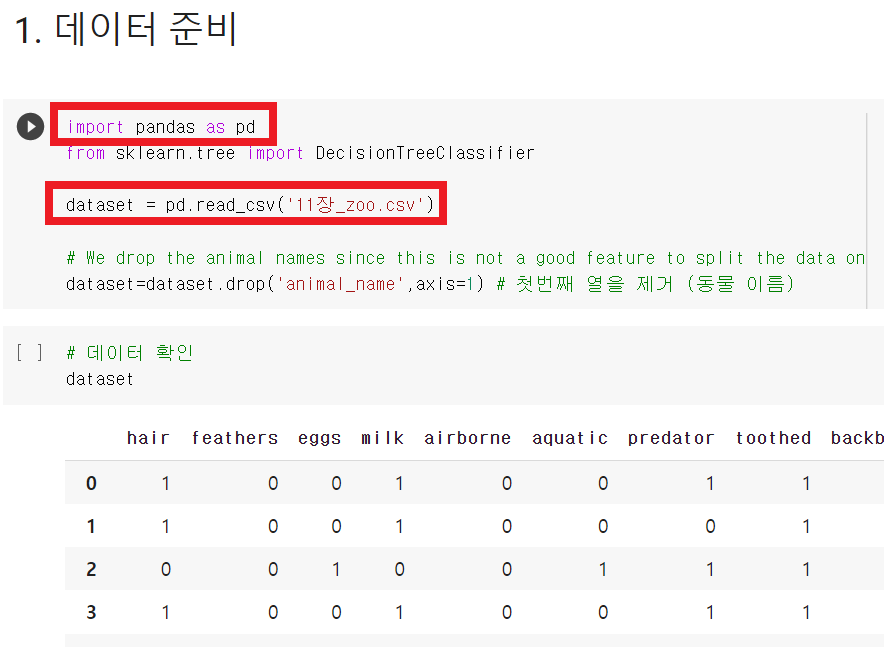

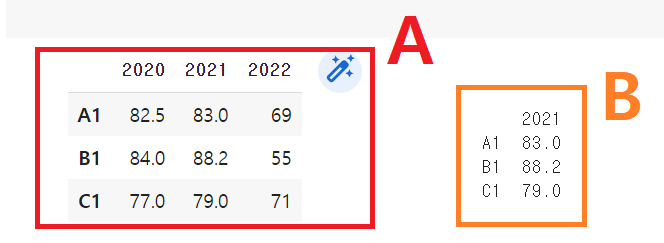

#연습 문제
- 위 그림 A는 2020, 2021, 2022년의 국방 ICT 중간고사 평균점수를 나타낸다.
- Q1) 오늘 배운 pandas 모듈을 활용하여, 그림 A와 같은 결과를 출력하시오.
- Q2) 그림 B와 같이, 2021년 데이터만 따로 출력하시오.

In [60]:
#####여기에 연습문제 답안을 작성하세요#####

import pandas as pd
columns = ["2020", "2021", "2022"]
index = ["A1", "B1", "C1"]
data = {
    "2020": [82.5, 84.0, 87.0],
    "2021": [83.0, 88.2, 79.0],
    "2022": [69.0, 55.0, 71.0]
}
df = pd.DataFrame(data, index=index, columns=columns)
df

A1    83.0
B1    88.2
C1    79.0
Name: 2021, dtype: float64

In [61]:
df["2021"]

A1    83.0
B1    88.2
C1    79.0
Name: 2021, dtype: float64